# Duration (processing time) "what-if" simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rng = np.random.default_rng(42)

In [3]:
n = 1000
xrange = [0, 100]

In [4]:
def plot_stages(s0, s1, s2, total):
    fig, ax = plt.subplots(1, 4, figsize=(12, 2), sharex=True, tight_layout=True)

    ax[0].hist(s0, bins=20, range=xrange)
    ax[0].set_title("S0 duration")

    ax[1].hist(s1, bins=20, range=xrange)
    ax[1].set_title("S1 duration")

    ax[2].hist(s2, bins=20, range=xrange)
    ax[2].set_title("S2 duration")

    ax[3].hist(total, bins=20, range=xrange)
    ax[3].set_title("Total duration")

    plt.show()

In [5]:
def run_sim(m, sd, n):
    s0 = rng.lognormal(m[0], sd[0], n)
    s1 = rng.lognormal(m[1], sd[1], n)
    s2 = rng.lognormal(m[2], sd[1], n)
    total = s0 + s1 + s2
    plot_stages(s0, s1, s2, total)
    print(f"Total p50, p95, p99={np.quantile(total, [0.5, 0.95, 0.99])}")

## Baseline 

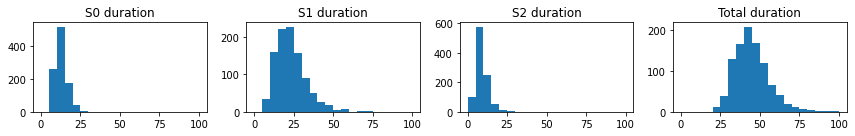

Total p50, p95, p99=[43.62544262 64.72267118 77.79945899]


In [6]:
base_mean = [2.5, 3.1, 2.1]
base_sd = [0.3, 0.4, 0.5]
run_sim(base_mean, base_sd, n)

## Improved 

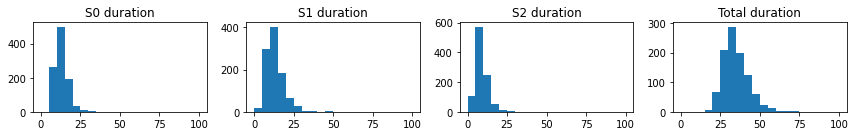

Total p50, p95, p99=[33.66956922 49.28802495 57.95676866]


In [7]:
imp_mean = [2.5, 2.5, 2.1]
imp_sd = base_sd
run_sim(imp_mean, imp_sd, n)